# 词云

这里涉及到一个很重要的知识点，中文分词

1 首先安装jieba分词包

+ pip install jiebe

2 然后做一个yes-minister的中文txt（yes_minister_cn），放在文件夹中

3 正式编程之前，还需要下载一个中文字体包，[地址是这个](https://s3-us-west-2.amazonaws.com/notion-static/b869cb0c7f4e4c909a069eaebbd2b7ad/simsun.ttf)。点击链接就直接下载了，文件名就是simsun.ttf

In [1]:
f_cn = open('猫.txt','r',encoding = 'utf-8')

In [2]:
text_cn = f_cn.read()

In [3]:
f_cn.close()

In [4]:
text_cn[:50]

'猫，属于猫科动物，分家猫、野猫，是全世界家庭中较为广泛的宠物。家猫的祖先据推测是古埃及的沙漠猫，波斯'

下面这一段代码很重要了，就是分词

In [5]:
import jieba

In [6]:
text_cn_word = "/".join(jieba.cut(text_cn))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\zhang\AppData\Local\Temp\jieba.cache
Loading model cost 0.602 seconds.
Prefix dict has been built successfully.


In [7]:
print(text_cn_word[:100])

猫/，/属于/猫科动物/，/分家/猫/、/野猫/，/是/全世界/家庭/中/较为/广泛/的/宠物/。/家猫/的/祖先/据/推测/是/古埃及/的/沙漠/猫/，/波斯/的/波斯猫/，/已经/被/人类/驯化/


现在按照英文词云的套路text_cn进行分词，看看效果

In [1]:
from wordcloud import WordCloud  # 关键代码1

In [2]:
wordcloud = WordCloud().generate(text_cn_word) # 关键代码2

NameError: name 'text_cn_word' is not defined

In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
import matplotlib.pyplot as plt

(-0.5, 399.5, 199.5, -0.5)

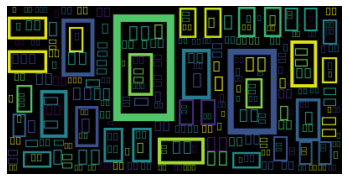

In [12]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

为什么会这样呢？

问题在哪里呢？这就需要我们之前下载的中文字体上场了，因为wordcloud默认的字体是英文的，中文就只有框框了

Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

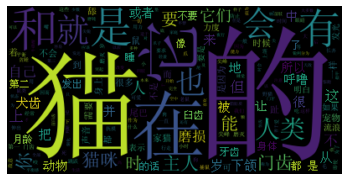

In [13]:
# 那就一起把以上的代码再重新输入一遍吧，再把字体加入
from wordcloud import WordCloud
wordcloud_cn = WordCloud(font_path="simsun.ttf").generate(text_cn_word)
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud_cn, interpolation='bilinear')
plt.axis('off')

好了！是不是感觉自己很不错呢

接下来，你还能想到哪些比较实用的改进呢？

## 给词云加上特定的形状

In [34]:
big_pic = imread('猫-1.jpg')

(-0.5, 1249.5, 749.5, -0.5)

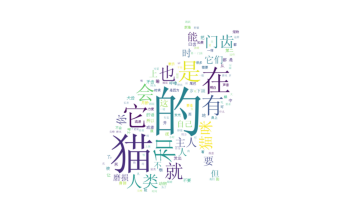

In [35]:
wordcloud_cn_x = WordCloud(mask=big_pic,width=500,height=300, background_color= 'white',scale=2.5, font_path="simsun.ttf").generate(text_cn_word)
plt.imshow(wordcloud_cn_x)
plt.axis('off')

In [36]:
wordcloud_cn_x.to_file('yes_minister_x.jpg')

这里有wordcloud所有参数的设置

In [37]:
class wordcloud.WordCloud(font_path=None, width=400, height=200, margin=2, ranks_only=None, prefer_horizontal=0.9,mask=None, scale=1, color_func=None, max_words=200, min_font_size=4, stopwords=None, random_state=None,background_color='black', max_font_size=None, font_step=1, mode='RGB', relative_scaling=0.5, regexp=None, collocations=True,colormap=None, normalize_plurals=True)

SyntaxError: invalid syntax (Temp/ipykernel_42288/4016778719.py, line 1)

In [38]:
font_path : string //字体路径，需要展现什么字体就把该字体路径+后缀名写上，如：font_path = '黑体.ttf'

width : int (default=400) //输出的画布宽度，默认为400像素

height : int (default=200) //输出的画布高度，默认为200像素

prefer_horizontal : float (default=0.90) //词语水平方向排版出现的频率，默认 0.9 （所以词语垂直方向排版出现频率为 0.1 ）

mask : nd-array or None (default=None) //如果参数为空，则使用二维遮罩绘制词云。如果 mask 非空，设置的宽高值将被忽略，遮罩形状被 mask 取代。除全白（#FFFFFF）的部分将不会绘制，其余部分会用于绘制词云。如：bg_pic = imread('读取一张图片.png')，背景图片的画布一定要设置为白色（#FFFFFF），然后显示的形状为不是白色的其他颜色。可以用ps工具将自己要显示的形状复制到一个纯白色的画布上再保存，就ok了。

scale : float (default=1) //按照比例进行放大画布，如设置为1.5，则长和宽都是原来画布的1.5倍。

min_font_size : int (default=4) //显示的最小的字体大小

font_step : int (default=1) //字体步长，如果步长大于1，会加快运算但是可能导致结果出现较大的误差。

max_words : number (default=200) //要显示的词的最大个数

stopwords : set of strings or None //设置需要屏蔽的词，如果为空，则使用内置的STOPWORDS

background_color : color value (default=”black”) //背景颜色，如background_color='white',背景颜色为白色。

max_font_size : int or None (default=None) //显示的最大的字体大小

mode : string (default=”RGB”) //当参数为“RGBA”并且background_color不为空时，背景为透明。

relative_scaling : float (default=.5) //词频和字体大小的关联性

color_func : callable, default=None //生成新颜色的函数，如果为空，则使用 self.color_func

regexp : string or None (optional) //使用正则表达式分隔输入的文本

collocations : bool, default=True //是否包括两个词的搭配

colormap : string or matplotlib colormap, default=”viridis” //给每个单词随机分配颜色，若指定color_func，则忽略该方法。



fit_words(frequencies)  //根据词频生成词云
generate(text)  //根据文本生成词云
generate_from_frequencies(frequencies[, ...])   //根据词频生成词云
generate_from_text(text)    //根据文本生成词云
process_text(text)  //将长文本分词并去除屏蔽词（此处指英语，中文分词还是需要自己用别的库先行实现，使用上面的 fit_words(frequencies) ）
recolor([random_state, color_func, colormap])   //对现有输出重新着色。重新上色会比重新生成整个词云快很多。
to_array()  //转化为 numpy array
to_file(filename)   //输出到文件

SyntaxError: invalid character '，' (U+FF0C) (Temp/ipykernel_42288/473755363.py, line 1)

基于以上设置作业